In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
df = pd.read_csv('final_data(전처리완료).csv', low_memory = False)
df.head()

,id,title,score_val,category,reviews,keyword1,keyword2,keyword3
0,35849217,쭈꾸미블루스 신촌본점,4.59,주꾸미요리,노포식당요즘 인기있는곳이래서 왔어요 주꾸미 삼겹 꽃게새우사리추가해서.먹었는데요 양념...,음식이 맛있어요,친절해요,인테리어가 멋져요
1,1749849331,금고기비스트로 신촌,4.49,"육류,고기요리",지나가는데 너무 예뻐서 술집인 줄 알았는데 알고 보니까 신촌 삼겹살 맛집이더라구요 ...,음식이 맛있어요,고기 질이 좋아요,친절해요
2,1198813653,댄싱홍콩 신촌점,4.49,중식당,협력사들과 회의 끝내고 오찬 같이했네요 간만에 오니 새로운 메뉴도 생기고.. 사람...,음식이 맛있어요,인테리어가 멋져요,특별한 메뉴가 있어요
3,1071728472,정통집 신촌점,4.32,돼지고기구이,이 리뷰는 업체로부터 무료 이용권을 제공 받은 대가로 작성한 솔직 후기입니다. h...,음식이 맛있어요,양이 많아요,친절해요
4,1491059869,오적회관 신촌점,4.49,한식,📺'생방송투데이'와 '맛의 승부사'에도 방영될 정도로 검증된 유명한 💢핫플매장이더라...,음식이 맛있어요,양이 많아요,재료가 신선해요


In [25]:
df.isna().sum()

id           0
title        0
score_val    0
category     0
reviews      0
keyword1     0
keyword2     0
keyword3     0
dtype: int64

## 📌 **리뷰 텍스트 정리하기**

In [28]:
df.reviews

0      노포식당요즘 인기있는곳이래서 왔어요 주꾸미 삼겹 꽃게새우사리추가해서.먹었는데요 양념...
1      지나가는데 너무 예뻐서 술집인 줄 알았는데 알고 보니까 신촌 삼겹살 맛집이더라구요 ...
2      협력사들과 회의 끝내고 오찬 같이했네요  간만에 오니 새로운 메뉴도 생기고.. 사람...
3      이 리뷰는 업체로부터 무료 이용권을 제공 받은 대가로 작성한 솔직 후기입니다.  h...
4      📺'생방송투데이'와 '맛의 승부사'에도 방영될 정도로 검증된 유명한 💢핫플매장이더라...
                             ...                        
665    이대역 혼밥 맛집 발견~~~!!! 신촌박스퀘어 계속 가봐야지 가봐야지 하다가 드디어...
666    아파트주민들이 아이들과 많이오는 느낌ㅋㅋㅋㅋ아기의자하나있고 식기도 요청하면 주십니다...
667    생일 저녁으로 남자친구랑 동네 가까운 곳에서 뭐먹을지 고민하다가 갑자기 참치가 땡겨...
668    친구와 너무 편안하고 즐거운 시간 보냈습니다. 음식도 너무 다 맛있고 와인도 잘어울...
669    바로 집앞이라 자주 가는 술집이에요. 납작만두 야채 완전 새콤하네요 ㅎㅎ 만두가 1...
Name: reviews, Length: 670, dtype: object

In [7]:
!pip install emoji

In [29]:
import re
import emoji

url_pattern = re.compile(
    r'https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)')

def clean_text(texts):
  corpus = []
  for i in range(0, len(texts)):

    review = re.sub(r'[@%\\*=()/~#&\+á?\xc3\xa1\-\|\.\:\;\!\-\,\_\~\$\'\"\n\]\[\>]', '',texts[i]) #@%*=()/+ 와 같은 문장부호 제거
    #review = re.sub(r'\d+','', review)#숫자 제거
    review = review.lower() #소문자 변환
    review = re.sub(r'\s+', ' ', review) #extra space 제거
    review = re.sub(r'<[^>]+>','',review) #Html tags 제거
    review = re.sub(r'\s+', ' ', review) #spaces 제거
    review = re.sub(r"^\s+", '', review) #space from start 제거
    review = re.sub(r'\s+$', '', review) #space from the end 제거
    review = re.sub(r'_', ' ', review) #space from the end 제거
    review = emoji.replace_emoji(review, replace='') #emoji 삭제
    review = url_pattern.sub('', review) #url 삭제
    corpus.append(review)

  return corpus

In [30]:
temp = clean_text(df['reviews'])
df['reviews'] = temp
df.reviews

0      노포식당요즘 인기있는곳이래서 왔어요 주꾸미 삼겹 꽃게새우사리추가해서먹었는데요 양념맛...
1      지나가는데 너무 예뻐서 술집인 줄 알았는데 알고 보니까 신촌 삼겹살 맛집이더라구요 ...
2      협력사들과 회의 끝내고 오찬 같이했네요 간만에 오니 새로운 메뉴도 생기고 사람이 많...
3      이 리뷰는 업체로부터 무료 이용권을 제공 받은 대가로 작성한 솔직 후기입니다 htt...
4      생방송투데이와 맛의 승부사에도 방영될 정도로 검증된 유명한 핫플매장이더라구요 테라스...
                             ...                        
665    이대역 혼밥 맛집 발견 신촌박스퀘어 계속 가봐야지 가봐야지 하다가 드디어 와봤는데 ...
666    아파트주민들이 아이들과 많이오는 느낌ㅋㅋㅋㅋ아기의자하나있고 식기도 요청하면 주십니다...
667    생일 저녁으로 남자친구랑 동네 가까운 곳에서 뭐먹을지 고민하다가 갑자기 참치가 땡겨...
668    친구와 너무 편안하고 즐거운 시간 보냈습니다 음식도 너무 다 맛있고 와인도 잘어울렸...
669    바로 집앞이라 자주 가는 술집이에요 납작만두 야채 완전 새콤하네요 ㅎㅎ 만두가 15...
Name: reviews, Length: 670, dtype: object

## 📌 **키워드 분석**

In [31]:
# 키워드1 유니크값
df['keyword1'].value_counts()

keyword1
음식이 맛있어요       489
커피가 맛있어요        59
디저트가 맛있어요       47
빵이 맛있어요         26
술이 다양해요          9
인테리어가 멋져요        9
음료가 맛있어요         8
가성비가 좋아요         5
친절해요             5
차가 맛있어요          3
집중하기 좋아요         3
특별한 메뉴가 있어요      2
주문제작을 잘해줘요       2
혼술하기 좋아요         1
뷰가 좋아요           1
혼밥하기 좋아요         1
Name: count, dtype: int64

In [32]:
# 키워드2 유니크값
df['keyword2'].value_counts()

keyword2
친절해요           169
가성비가 좋아요        97
재료가 신선해요        77
특별한 메뉴가 있어요     63
혼밥하기 좋아요        52
양이 많아요          43
인테리어가 멋져요       41
디저트가 맛있어요       24
커피가 맛있어요        23
고기 질이 좋아요       17
음료가 맛있어요        13
술이 다양해요         12
음식이 맛있어요         9
음악이 좋아요          5
매장이 넓어요          5
단체모임 하기 좋아요      3
기본 안주가 좋아요       3
뷰가 좋아요           3
매장이 청결해요         3
집중하기 좋아요         3
차가 맛있어요          2
혼술하기 좋아요         1
주차하기 편해요         1
대화하기 좋아요         1
Name: count, dtype: int64

In [33]:
# 키워드3 유니크값
df['keyword3'].value_counts()

keyword3
친절해요            183
가성비가 좋아요         68
혼밥하기 좋아요         65
양이 많아요           56
특별한 메뉴가 있어요      55
재료가 신선해요         54
인테리어가 멋져요        43
음료가 맛있어요         23
매장이 넓어요          20
커피가 맛있어요         17
매장이 청결해요         17
고기 질이 좋아요        14
디저트가 맛있어요        12
술이 다양해요           8
기본 안주가 좋아요        7
대화하기 좋아요          5
뷰가 좋아요            3
단체모임 하기 좋아요       3
사진이 잘 나와요         2
좌석이 편해요           2
음식이 맛있어요          2
빵이 맛있어요           2
아늑해요              1
선물하기 좋아요          1
직접 잘 구워줘요         1
음악이 좋아요           1
음식이 빨리 나와요        1
집중하기 좋아요          1
특별한 날 가기 좋아요      1
메뉴 구성이 알차요        1
차가 맛있어요           1
Name: count, dtype: int64

In [14]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

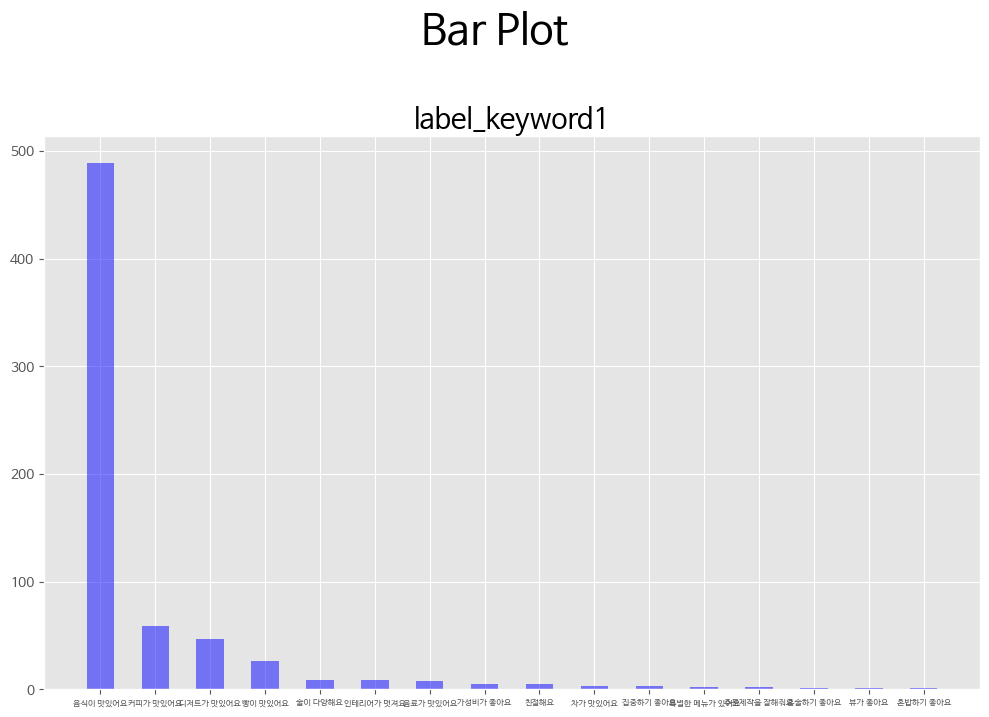

In [41]:
plt.rc('font', family='NanumBarunGothic')
plt.style.use("ggplot")

# 히스토그램
feature = df['keyword1']

plt.figure(figsize=(10,7.5)) # 그래프 이미지 크기 설정
plt.suptitle("Bar Plot", fontsize=30) # 부제목과 폰트 크기 설정

plt.title('label_keyword1', fontsize=20) # 제목과 폰트 크기 설정
temp = feature.value_counts() # feature 변수의 변수별 개수 계산
plt.bar(temp.keys(), temp.values, width=0.5, color='b', alpha=0.5) # 막대그래프 생성
plt.xticks(temp.keys(), fontsize=6) # x축 값, 폰트 크기 설정
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # 레이아웃 설정
plt.show() # 그래프 나타내기

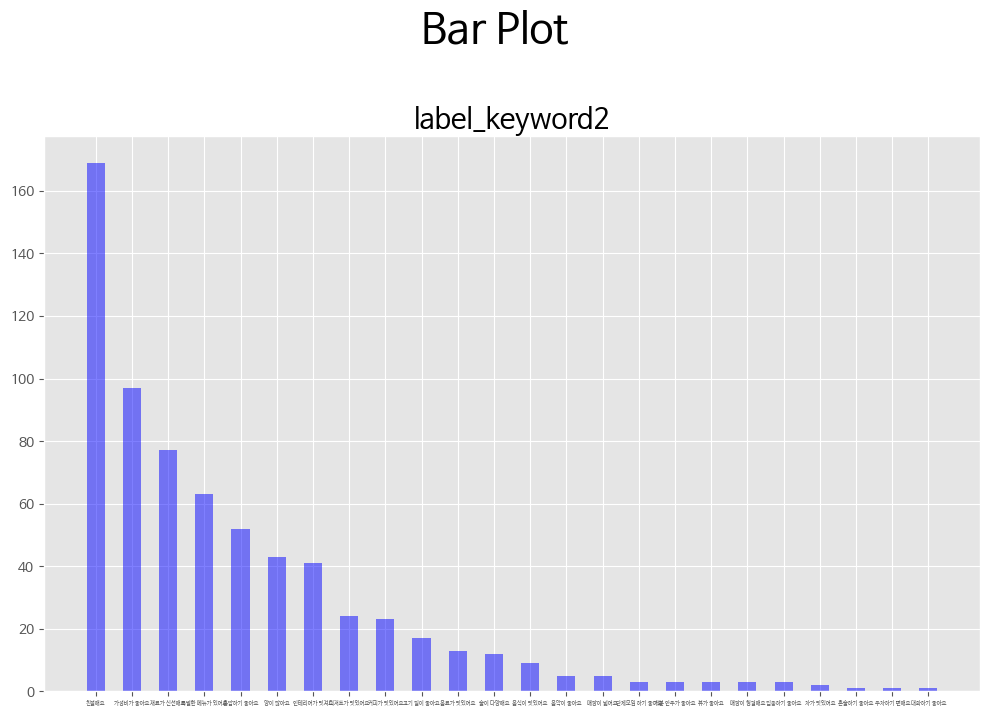

In [37]:
# 히스토그램
feature = df['keyword2']

plt.figure(figsize=(10,7.5)) # 그래프 이미지 크기 설정
plt.suptitle("Bar Plot", fontsize=30) # 부제목과 폰트 크기 설정

plt.title('label_keyword2', fontsize=20) # 제목과 폰트 크기 설정
temp = feature.value_counts() # feature 변수의 변수별 개수 계산
plt.bar(temp.keys(), temp.values, width=0.5, color='b', alpha=0.5) # 막대그래프 생성
plt.xticks(temp.keys(), fontsize=4) # x축 값, 폰트 크기 설정
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # 레이아웃 설정
plt.show() # 그래프 나타내기

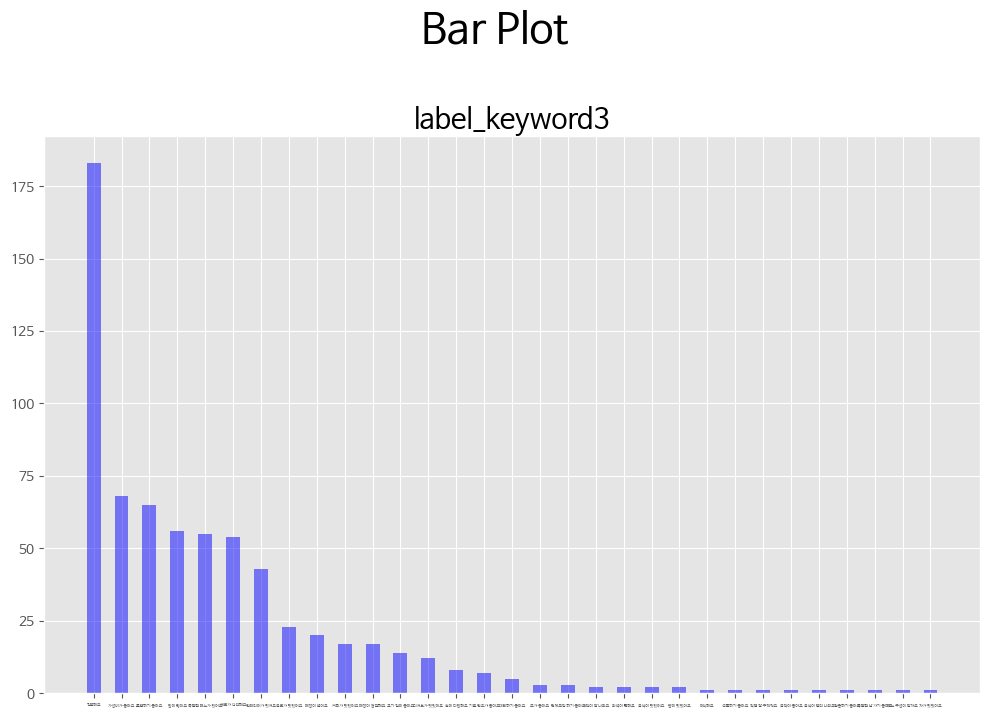

In [36]:
# 히스토그램
feature = df['keyword3']

plt.figure(figsize=(10,7.5)) # 그래프 이미지 크기 설정
plt.suptitle("Bar Plot", fontsize=30) # 부제목과 폰트 크기 설정

plt.title('label_keyword3', fontsize=20) # 제목과 폰트 크기 설정
temp = feature.value_counts() # feature 변수의 변수별 개수 계산
plt.bar(temp.keys(), temp.values, width=0.5, color='b', alpha=0.5) # 막대그래프 생성
plt.xticks(temp.keys(), fontsize=3) # x축 값, 폰트 크기 설정
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # 레이아웃 설정
plt.show() # 그래프 나타내기

## 📌 **리뷰 길이 평균 구하기**

In [40]:
# 리뷰 길이의 평균값
review_len_mean = np.mean(df['reviews'].str.len())
print('리뷰의 평균 길이 :',round(review_len_mean,0))

리뷰의 평균 길이 : 955.0


## 📌 **첫 번째 키워드가 '음식이 맛있어요' 인 경우의 가게의 리뷰 분석하기**

In [69]:
df['keyword1'].unique()

array(['음식이 맛있어요', '디저트가 맛있어요', '차가 맛있어요', '술이 다양해요', '빵이 맛있어요',
       '커피가 맛있어요', '인테리어가 멋져요', '집중하기 좋아요', '가성비가 좋아요', '친절해요',
       '음료가 맛있어요', '특별한 메뉴가 있어요', '혼술하기 좋아요', '주문제작을 잘해줘요', '뷰가 좋아요',
       '혼밥하기 좋아요'], dtype=object)

In [65]:
# 데이터 필터링을 위한 마스크 설정
for i in range(0, 16):
  globals()['mask_{}'.format(i)] = (df.keyword1 == df['keyword1'].unique()[i])

# 전체 및 그룹 집합을 설정합니다.
df_train = df.reviews.copy() # 전체 train 데이터

for i in range(0, 16):
  globals()['df_{}'.format(i)] = df.loc[globals()['mask_{}'.format(i)],:].reviews # 20가지 라벨 각각에 해당하는 데이터를 df0~19로 할당

# 스무가지로 나뉜 집합을 리스트로 묶어줍니다.
compare = [df_0, df_1, df_2, df_3, df_4, df_5,
           df_6, df_7, df_8, df_9, df_10, df_11,
           df_12, df_13, df_14, df_15]

In [66]:
df_0

0      노포식당요즘 인기있는곳이래서 왔어요 주꾸미 삼겹 꽃게새우사리추가해서먹었는데요 양념맛...
1      지나가는데 너무 예뻐서 술집인 줄 알았는데 알고 보니까 신촌 삼겹살 맛집이더라구요 ...
2      협력사들과 회의 끝내고 오찬 같이했네요 간만에 오니 새로운 메뉴도 생기고 사람이 많...
3      이 리뷰는 업체로부터 무료 이용권을 제공 받은 대가로 작성한 솔직 후기입니다 htt...
4      생방송투데이와 맛의 승부사에도 방영될 정도로 검증된 유명한 핫플매장이더라구요 테라스...
                             ...                        
664    늦은시간 추워도 너무 따뜻한 기분으로 혼밥했어요 얼마만에 느껴보는 감정인지 너무 감...
665    이대역 혼밥 맛집 발견 신촌박스퀘어 계속 가봐야지 가봐야지 하다가 드디어 와봤는데 ...
666    아파트주민들이 아이들과 많이오는 느낌ㅋㅋㅋㅋ아기의자하나있고 식기도 요청하면 주십니다...
667    생일 저녁으로 남자친구랑 동네 가까운 곳에서 뭐먹을지 고민하다가 갑자기 참치가 땡겨...
669    바로 집앞이라 자주 가는 술집이에요 납작만두 야채 완전 새콤하네요 ㅎㅎ 만두가 15...
Name: reviews, Length: 489, dtype: object

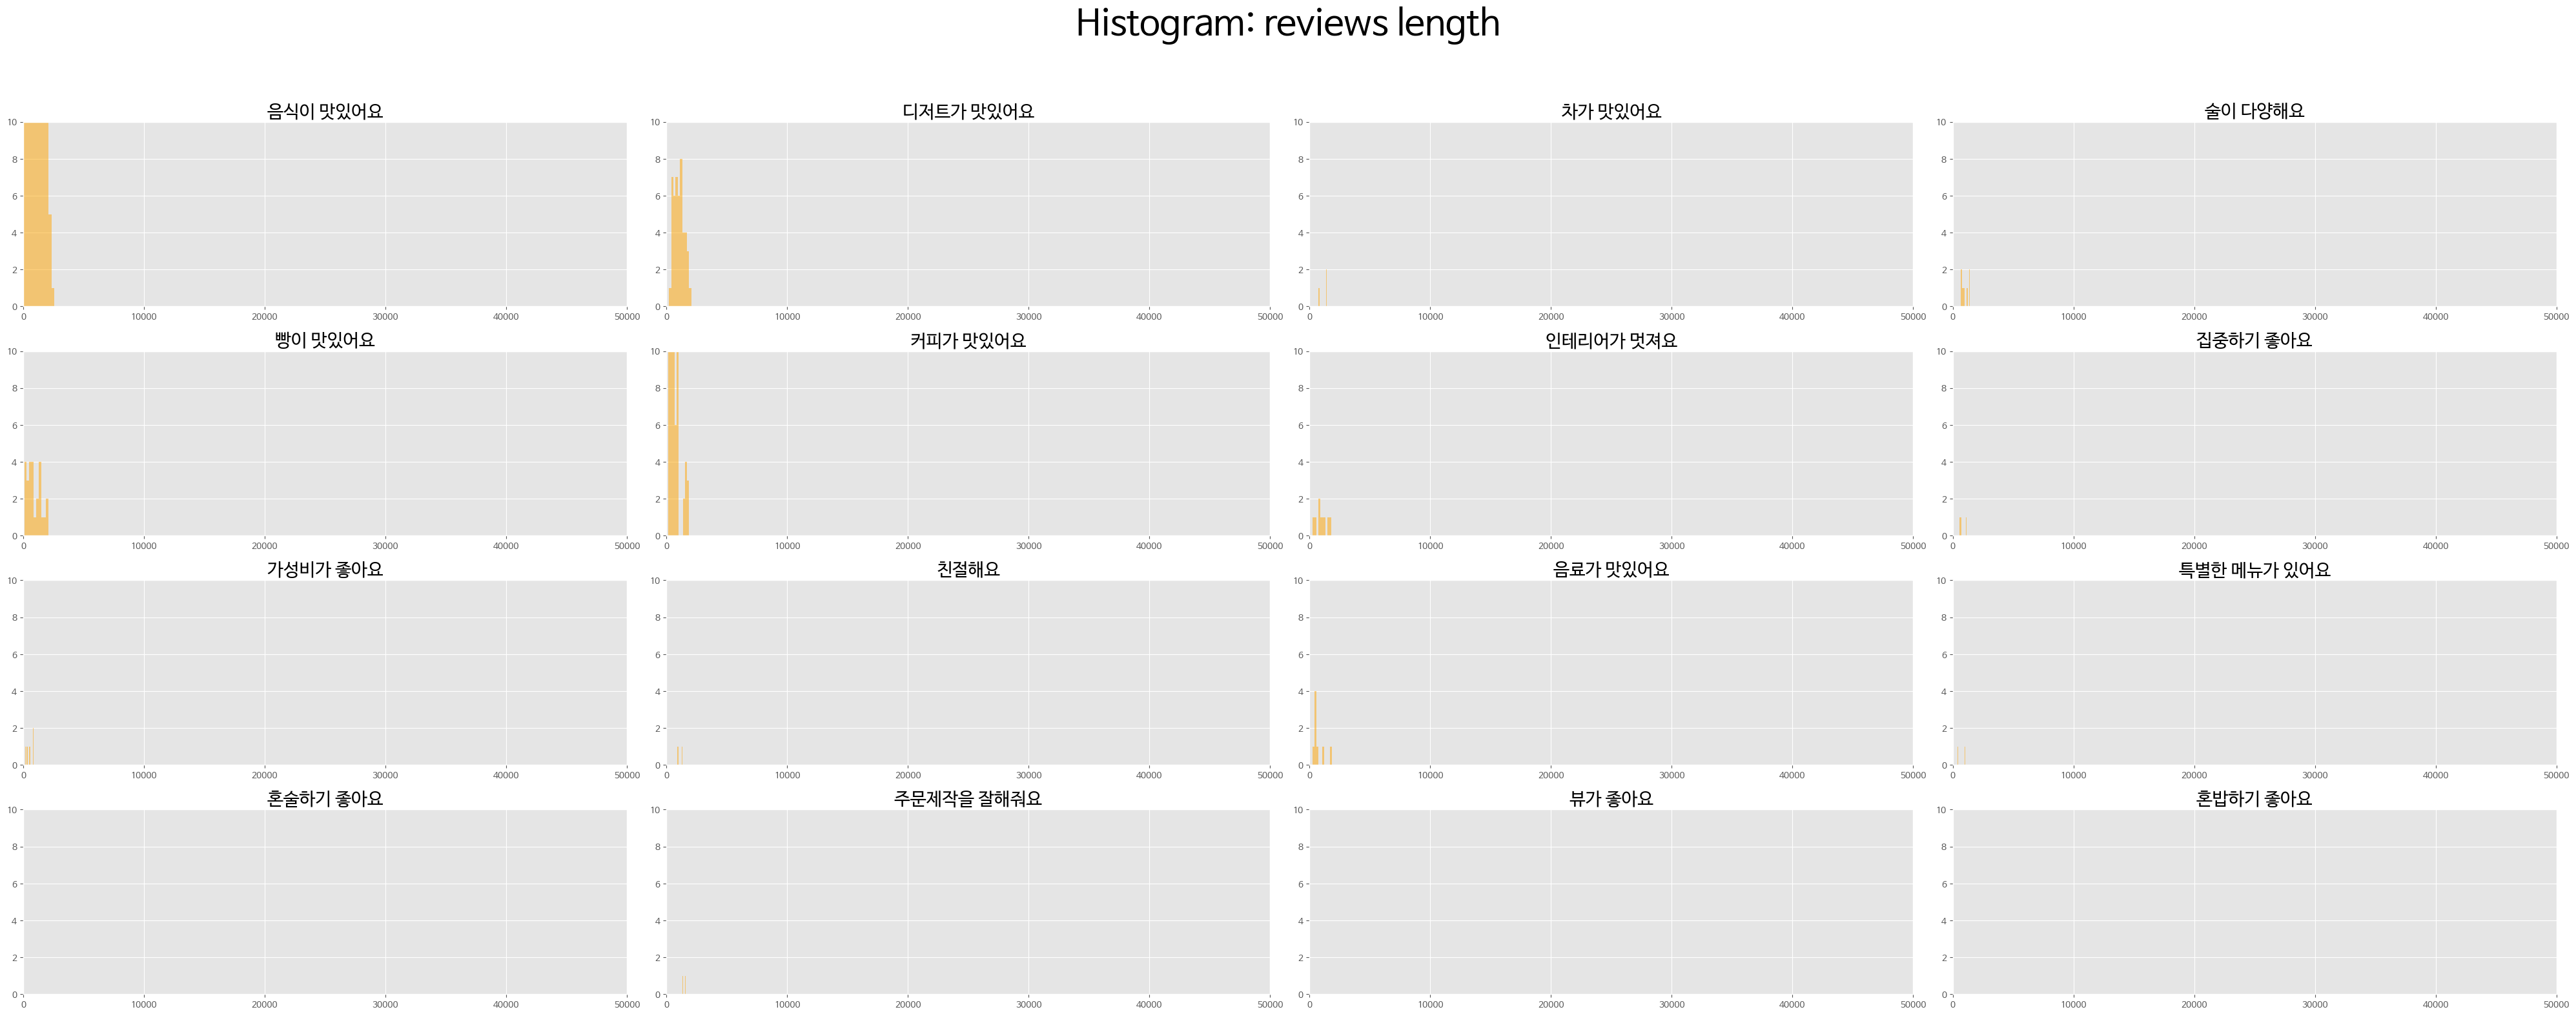

In [71]:
plt.figure(figsize=(40,20))
plt.suptitle("Histogram: reviews length", fontsize=40)
name = ['음식이 맛있어요', '디저트가 맛있어요', '차가 맛있어요', '술이 다양해요', '빵이 맛있어요',
       '커피가 맛있어요', '인테리어가 멋져요', '집중하기 좋아요', '가성비가 좋아요', '친절해요',
       '음료가 맛있어요', '특별한 메뉴가 있어요', '혼술하기 좋아요', '주문제작을 잘해줘요', '뷰가 좋아요',
       '혼밥하기 좋아요'] # 제목으로 사용할 문자열 (라벨의 실제 이름)

for i in range(len(compare)):
    text = compare[i]
    string_len = [len(x) for x in text]
    plt.subplot(5,4,i+1) # 행 개수/ 열 개수/ 해당 그래프 표시 순서
    plt.title(name[i], fontsize=20)
    plt.axis([0, 50000, 0, 10])  #x축 시작, 끝 / y축 시작, 끝
    plt.hist(string_len, alpha=0.5, color='orange') # 히스토그램 생성, alpha: 그래프의 투명도 조절

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [51]:
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import nltk
import pickle
from nltk.corpus import stopwords
from os import path
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [52]:
# 워드 토큰화
def df2str(df):

    s = [s for s in df]
    document = ""
    for i in range(len(s)):
        document += s[i]
    return document

In [68]:
word_tokens = nltk.word_tokenize(df2str(df_0))

In [83]:
!apt-get update -qq

In [88]:
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 51.8 MB/s eta 0:00:00


In [89]:
from konlpy.tag import Okt

In [90]:
okt = Okt()
morphs = okt.pos(df2str(df_0))

In [91]:
words = [word for word, pos in morphs if pos == 'Noun']
print(words)

['노포', '식당', '요즘', '인기', '곳', '주꾸미', '삼겹', '꽃게', '새우', '사리', '추가', '양념', '맛', '볶음밥', '맛', '퐁듀', '치즈', '상의', '맛', '요', '양도', '서남', '것', '포장', '사장', '진짜', '맛', '거', '먹이', '엄마', '마음', '용', '감사', '쭈꾸미', '온', '신촌', '역시', '기대', '저', '핵존맛', '점심', '특선', '가격', '쭈꾸미', '우리', '여친', '느님', '요', '만족', '또한', '볶음밥', '하트', '술', '점심', '패스', '진짜', '다음', '또', '집', '데', '처음', '쭈삼', '기본', '셋팅', '홍합', '콘치', '계란', '쭈꾸미', '삼겹', '무난', '무난', '볶음밥', '별미', '계란찜', '보', '려', '먹렀더', '직원', '리', '쥬셨', '처음', '때', '아마', '맛집', '유지', '역시', '맛', '가게', '인테리어', '옛날', '감성', '정감', '직원', '쭈꾸미', '국물', '마법', '소스', '국물', '매콤', '계속', '마', '성의', '맛', '요즘', '물가', '예전', '날치', '알', '지금', '마요네즈', '날치', '알도', '쭈꾸미', '매콤', '마요네즈', '소스', '날치', '알', '대신', '맛', '중화', '반찬', '경우', '셀프', '바', '직원', '리필', '수', '그게', '더', '것', '계속', '계속', '장사', '이번', '쭈꾸미', '양도', '구성', '매콤', '맵', '수', '볶음밥', '치즈', '계란', '이', '미네', '사장', '서도', '정말', '쭈꾸미', '양도', '달걀찜', '무한리필', '야채', '셀프', '바', '짐', '가게', '컨셉', '감성', '타임머신', '타고', '과거', '이상', '신촌', '맛집', '생방송', '방송',

In [96]:
from collections import Counter
stopwords = ['방문', '맛집', '신촌', '음식', '메뉴', '너무', '맛있어요', '진짜', '잘', '정말', '다', '수', '좋아요', '맛있게', '또', '아','휴','아이구','아이쿠','아이고','어','나','우리','저희','따라','의해','을','를','에','의','가','으로','로','에게','뿐이다','의거하여','근거하여','입각하여','기준으로','예하면','예를 들면','예를 들자면','저','소인','소생','저희','지말고','하지마','하지마라','다른','물론','또한','그리고','비길수 없다','해서는 안된다','뿐만 아니라','만이 아니다','만은 아니다','막론하고','관계없이','그치지 않다','그러나','그런데','하지만','든간에','논하지 않다','따지지 않다','설사','비록','더라도','아니면','만 못하다','하는 편이 낫다','불문하고','향하여','향해서','향하다','쪽으로','틈타','이용하여','타다','오르다','제외하고','이 외에','이 밖에','하여야','비로소','한다면 몰라도','외에도','이곳','여기','부터','기점으로','따라서','할 생각이다','하려고하다','이리하여','그리하여','그렇게 함으로써','하지만','일때','할때','앞에서','중에서','보는데서','으로써','로써','까지','해야한다','일것이다','반드시','할줄알다','할수있다','할수있어','임에 틀림없다','한다면','등','등등','제','겨우','단지','다만','할뿐','딩동','댕그','대해서','대하여','대하면','훨씬','얼마나','얼마만큼','얼마큼','남짓','여','얼마간','약간','다소','좀','조금','다수','몇','얼마','지만','하물며','또한','그러나','그렇지만','하지만','이외에도','대해 말하자면','뿐이다','다음에','반대로','반대로 말하자면','이와 반대로','바꾸어서 말하면','바꾸어서 한다면','만약','그렇지않으면','까악','툭','딱','삐걱거리다','보드득','비걱거리다','꽈당','응당','해야한다','에 가서','각','각각','여러분','각종','각자','제각기','하도록하다','와','과','그러므로','그래서','고로','한 까닭에','하기 때문에','거니와','이지만','대하여','관하여','관한','과연','실로','아니나다를가','생각한대로','진짜로','한적이있다','하곤하였다','하','하하','허허','아하','거바','와','오','왜','어째서','무엇때문에','어찌','하겠는가','무슨','어디','어느곳','더군다나','하물며','더욱이는','어느때','언제','야','이봐','어이','여보시오','흐흐','흥','휴','헉헉','헐떡헐떡','영차','여차','어기여차','끙끙','아야','앗','아야','콸콸','졸졸','좍좍','뚝뚝','주룩주룩','솨','우르르','그래도','또','그리고','바꾸어말하면','바꾸어말하자면','혹은','혹시','답다','및','그에 따르는','때가 되어','즉','지든지','설령','가령','하더라도','할지라도','일지라도','지든지','몇','거의','하마터면','인젠','이젠','된바에야','된이상','만큼','어찌됏든','그위에','게다가','점에서 보아','비추어 보아','고려하면','하게될것이다','일것이다','비교적','좀','보다더','비하면','시키다','하게하다','할만하다','의해서','연이서','이어서','잇따라','뒤따라','뒤이어','결국','의지하여','기대여','통하여','자마자','더욱더','불구하고','얼마든지','마음대로','주저하지 않고','곧','즉시','바로','당장','하자마자','밖에 안된다','하면된다','그래','그렇지','요컨대','다시 말하자면','바꿔 말하면','즉','구체적으로 말하자면','시작하여','시초에','이상','허','헉','허걱','바와같이','해도좋다','해도된다','게다가','더구나','하물며','와르르','팍','퍽','펄렁','동안','이래','하고있었다','이었다','에서','로부터','까지','예하면','했어요','해요','함께','같이','더불어','마저','마저도','양자','모두','습니다','가까스로','하려고하다','즈음하여','다른','다른 방면으로','해봐요','습니까','했어요','말할것도 없고','무릎쓰고','개의치않고','하는것만 못하다','하는것이 낫다','매','매번','들','모','어느것','어느','로써','갖고말하자면','어디','어느쪽','어느것','어느해','어느 년도','라 해도','언젠가','어떤것','어느것','저기','저쪽','저것','그때','그럼','그러면','요만한걸','그래','그때','저것만큼','그저','이르기까지','할 줄 안다','할 힘이 있다','너','너희','당신','어찌','설마','차라리','할지언정','할지라도','할망정','할지언정','구토하다','게우다','토하다','메쓰겁다','옆사람','퉤','쳇','의거하여','근거하여','의해','따라','힘입어','그','다음','버금','두번째로','기타','첫번째로','나머지는','그중에서','견지에서','형식으로 쓰여','입장에서','위해서','단지','의해되다','하도록시키다','뿐만아니라','반대로','전후','전자','앞의것','잠시','잠깐','하면서','그렇지만','다음에','그러한즉','그런즉','남들','아무거나','어찌하든지','같다','비슷하다','예컨대','이럴정도로','어떻게','만약','만일','위에서 서술한바와같이','인 듯하다','하지 않는다면','만약에','무엇','무슨','어느','어떤','아래윗','조차','한데','그럼에도 불구하고','여전히','심지어','까지도','조차도','하지 않도록','않기 위하여','때','시각','무렵','시간','동안','어때','어떠한','하여금','네','예','우선','누구','누가 알겠는가','아무도','줄은모른다','줄은 몰랏다','하는 김에','겸사겸사','하는바','그런 까닭에','한 이유는','그러니','그러니까','때문에','그','너희','그들','너희들','타인','것','것들','너','위하여','공동으로','동시에','하기 위하여','어찌하여','무엇때문에','붕붕','윙윙','나','우리','엉엉','휘익','윙윙','오호','아하','어쨋든','만 못하다','하기보다는','차라리','하는 편이 낫다','흐흐','놀라다','상대적으로 말하자면','마치','아니라면','쉿','그렇지 않으면','그렇지 않다면','안 그러면','아니었다면','하든지','아니면','이라면','좋아','알았어','하는것도','그만이다','어쩔수 없다','하나','일','일반적으로','일단','한켠으로는','오자마자','이렇게되면','이와같다면','전부','한마디','한항목','근거로','하기에','아울러','하지 않도록','않기 위해서','이르기까지','이 되다','로 인하여','까닭으로','이유만으로','이로 인하여','그래서','이 때문에','그러므로','그런 까닭에','알 수 있다','결론을 낼 수 있다','으로 인하여','있다','어떤것','관계가 있다','관련이 있다','연관되다','어떤것들','에 대해','이리하여','그리하여','여부','하기보다는','하느니','하면 할수록','운운','이러이러하다','하구나','하도다','다시말하면','다음으로','에 있다','에 달려 있다','우리','우리들','오히려','하기는한데','어떻게','어떻해','어찌됏어','어때','어째서','본대로','자','이','이쪽','여기','이것','이번','이렇게말하자면','이런','이러한','이와 같은','요만큼','요만한 것','얼마 안 되는 것','이만큼','이 정도의','이렇게 많은 것','이와 같다','이때','이렇구나','것과 같이','끼익','삐걱','따위','와 같은 사람들','부류의 사람들','왜냐하면','중의하나','오직','오로지','에 한하다','하기만 하면','도착하다','까지 미치다','도달하다','정도에 이르다','할 지경이다','결과에 이르다','관해서는','여러분','하고 있다','한 후','혼자','자기','자기집','자신','우에 종합한것과같이','총적으로 보면','총적으로 말하면','총적으로','대로 하다','으로서','참','그만이다','할 따름이다','쿵','탕탕','쾅쾅','둥둥','봐','봐라','아이야','아니','와아','응','아이','참나','년','월','일','령','영','일','이','삼','사','오','육','륙','칠','팔','구','이천육','이천칠','이천팔','이천구','하나','둘','셋','넷','다섯','여섯','일곱','여덟','아홉','령','영'
]
result = [x for x in words if x not in stopwords and len(x) > 1]
print(result)

['노포', '식당', '요즘', '인기', '주꾸미', '삼겹', '꽃게', '새우', '사리', '추가', '양념', '볶음밥', '퐁듀', '치즈', '상의', '양도', '서남', '포장', '사장', '먹이', '엄마', '마음', '감사', '쭈꾸미', '역시', '기대', '핵존맛', '점심', '특선', '가격', '쭈꾸미', '여친', '느님', '만족', '볶음밥', '하트', '점심', '패스', '처음', '쭈삼', '기본', '셋팅', '홍합', '콘치', '계란', '쭈꾸미', '삼겹', '무난', '무난', '볶음밥', '별미', '계란찜', '먹렀더', '직원', '쥬셨', '처음', '아마', '유지', '역시', '가게', '인테리어', '옛날', '감성', '정감', '직원', '쭈꾸미', '국물', '마법', '소스', '국물', '매콤', '계속', '성의', '요즘', '물가', '예전', '날치', '지금', '마요네즈', '날치', '알도', '쭈꾸미', '매콤', '마요네즈', '소스', '날치', '대신', '중화', '반찬', '경우', '셀프', '직원', '리필', '그게', '계속', '계속', '장사', '쭈꾸미', '양도', '구성', '매콤', '볶음밥', '치즈', '계란', '미네', '사장', '서도', '쭈꾸미', '양도', '달걀찜', '무한리필', '야채', '셀프', '가게', '컨셉', '감성', '타임머신', '타고', '과거', '생방송', '방송', '추가', '반찬', '직접', '술안주', '쭈꾸미', '삼겹살', '레트로', '분위기', '홍합', '콘치', '계란찜', '깻잎', '쭈꾸미', '마요네즈', '소스', '마지막', '치즈', '볶음밥', '양념', '계란', '치즈', '배합', '완벽', '볶음밥', '치즈', '볶음밥', '술집', '삼겹살', '고기', '직접', '주시', '한기', '소스', '반찬', '분위기', '계획', '술술', '분위기', '고

In [97]:
c = Counter(result)
print(c.most_common(10))

[('사장', 620), ('고기', 597), ('추천', 476), ('주문', 446), ('분위기', 419), ('직원', 381), ('가성', 367), ('소스', 365), ('가격', 362), ('매장', 361)]


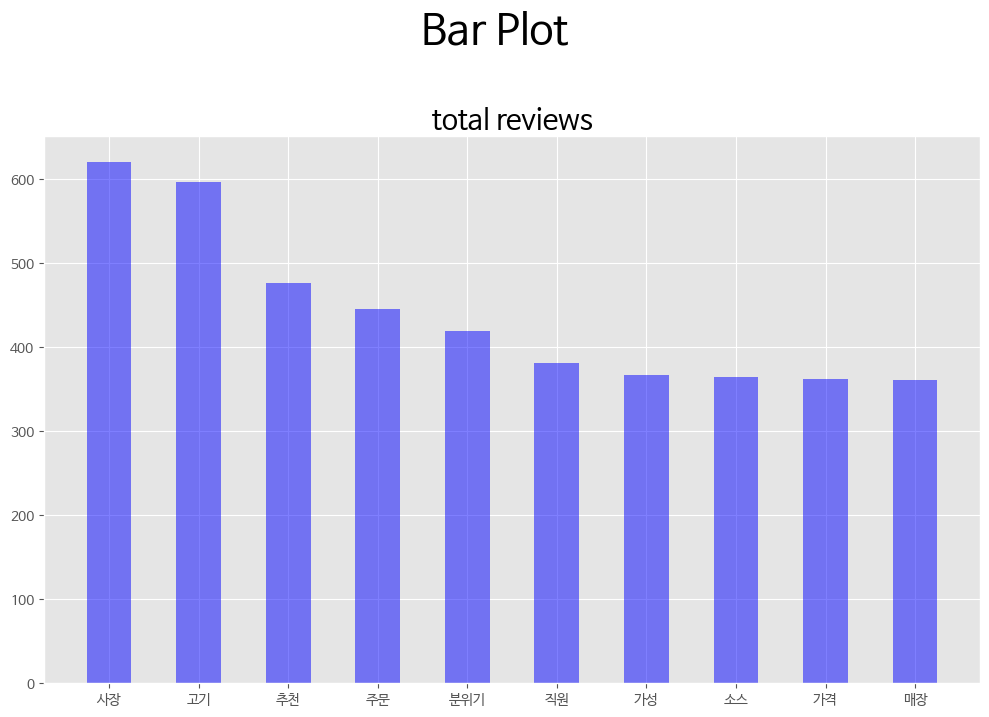

In [98]:
top_10 = c.most_common(10) # 추출한 명사 중 상위 10개
keys = [top_10[i][0] for i in range(len(top_10))]
values = [top_10[i][1] for i in range(len(top_10))]

plt.figure(figsize=(10,7.5))
plt.suptitle("Bar Plot", fontsize=30)
plt.title('total reviews', fontsize=20)
plt.bar(keys, values, width=0.5, color='b', alpha=0.5)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [84]:
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum-coding.
(Reading database ... 121949 files and directories currently installed.)
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-coding (2.5-3) ...
Setting up fonts-nanum-eco (1.000-7) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


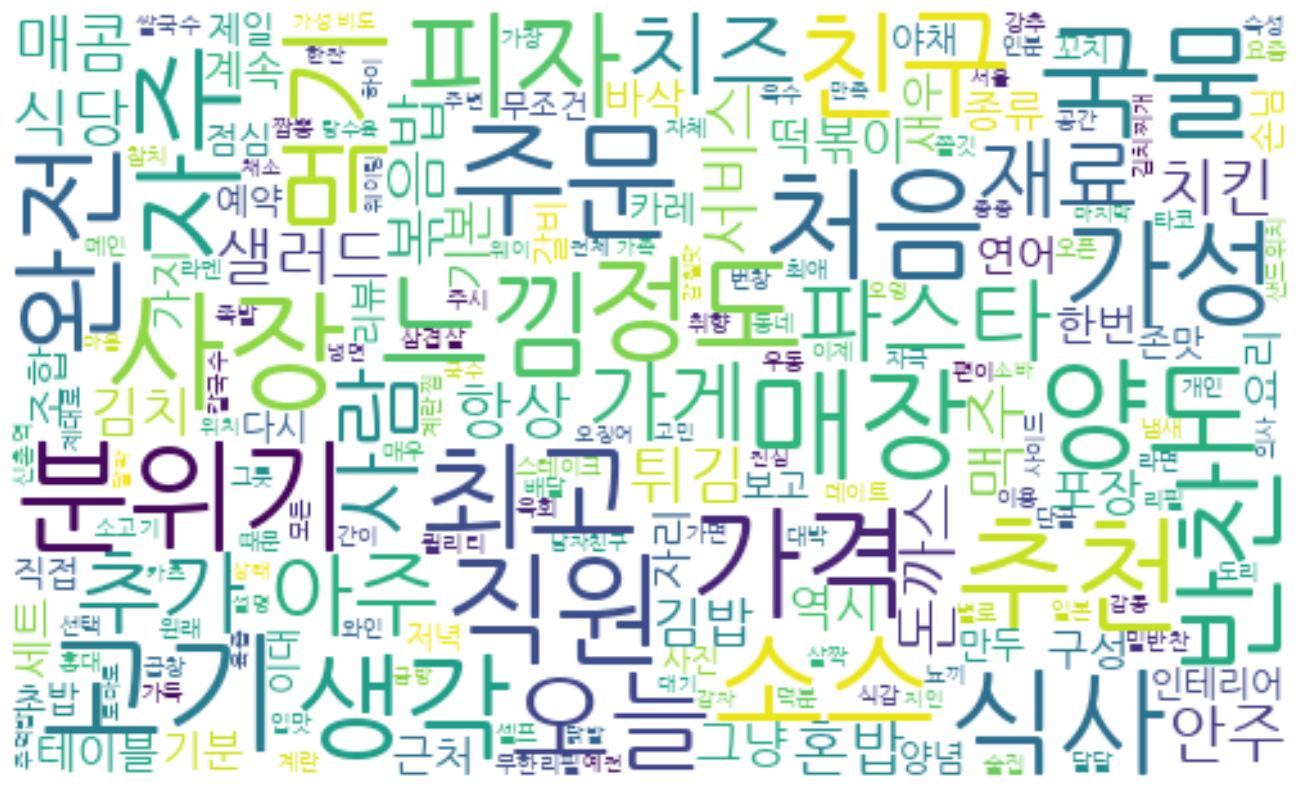

In [99]:
FONT_PATH = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"

noun_text = " ".join(result)
wordcloud = WordCloud(max_font_size=50, #가장 큰 폰트 크기 제한
                      width=500, #너비
                      height=300, #높이
                      background_color='white', #배경 색상
                      relative_scaling=.2, #상대적인 크기
                      font_path=FONT_PATH
                      ).generate(noun_text)

plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## 💥 **별점 고유값 확인**

In [26]:
# 별점 고유값 확인
temp = df.score_val.unique()
np.sort(temp)

array([3.96, 3.99, 4.12, 4.13, 4.14, 4.15, 4.16, 4.17, 4.18, 4.19, 4.21,
       4.23, 4.24, 4.25, 4.26, 4.27, 4.28, 4.29, 4.3 , 4.31, 4.32, 4.33,
       4.34, 4.35, 4.36, 4.37, 4.38, 4.39, 4.4 , 4.41, 4.42, 4.43, 4.44,
       4.45, 4.46, 4.47, 4.48, 4.49, 4.5 , 4.51, 4.52, 4.53, 4.54, 4.55,
       4.56, 4.57, 4.58, 4.59, 4.6 , 4.61, 4.62, 4.63, 4.64, 4.65, 4.66,
       4.67, 4.68, 4.69, 4.7 , 4.71, 4.72, 4.73, 4.74, 4.75, 4.76, 4.77,
       4.78, 4.79, 4.8 , 4.81, 4.82, 4.83, 4.84, 4.9 , 4.91, 4.92, 4.95])

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 670 entries, 0 to 669
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         670 non-null    int64  
 1   title      670 non-null    object 
 2   score_val  670 non-null    float64
 3   category   670 non-null    object 
 4   reviews    670 non-null    object 
 5   keyword1   670 non-null    object 
 6   keyword2   670 non-null    object 
 7   keyword3   670 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 42.0+ KB
